In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [21]:
dataset = 'dataset_new.csv'
model_save_path = 'pose_detector.keras'
model_save_name = 'pose_detector'
model_tflite_name = 'pose_detector.tflite'

In [3]:
NUM_CLASSES = 6

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(2, 10 + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
# y_dataset = y_dataset - 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476 (1.86 KB)

 Trainable params: 476 (1.86 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model checkpoint callback
# path_model = os.path.dirname(model_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path, verbose=1, save_weights_only=False
)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
381/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2076 - loss: 8.1187
Epoch 1: saving model to pose_detector.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2090 - loss: 8.0214 - val_accuracy: 0.4433 - val_loss: 1.2976
Epoch 2/1000
383/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3513 - loss: 1.5699
Epoch 2: saving model to pose_detector.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3515 - loss: 1.5688 - val_accuracy: 0.4567 - val_loss: 1.2557
Epoch 3/1000
378/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3866 - loss: 1.4095
Epoch 3: saving model to pose_detector.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3870 - loss: 1.4090 - val_accuracy: 0.5114 - val_loss: 1.2070
Epoch 4/1000
380/390 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4266 - loss: 1.3288
Epoch 4: saving model to pose_detector.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4268 - loss: 1.3282 - val_accuracy: 0.5627 - val_loss: 1.0903


In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8083 - loss: 0.6069


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[5.3687687e-03 2.0134654e-02 4.4348385e-04 9.2142582e-01 6.5334877e-03
 4.6093810e-02]
3


# Save Model to TFfile

In [19]:
model.export(model_save_name)

INFO:tensorflow:Assets written to: pose_detector.tflite\assets


INFO:tensorflow:Assets written to: pose_detector.tflite\assets


Saved artifact at 'pose_detector.tflite'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2168471491808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168471494272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168506106800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168506109968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168506117184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168506112960: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [33]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_save_name)
tflite_model = converter.convert()

In [34]:
with open(model_tflite_name, 'wb') as f:
    f.write(tflite_model)

# Confussion Matrix

520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step


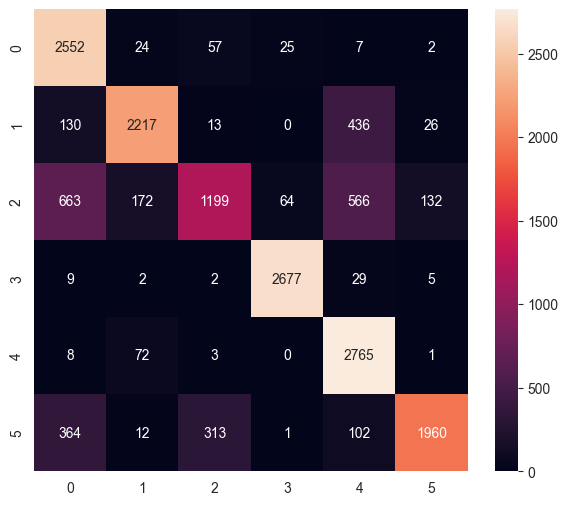

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.96      0.80      2667
           1       0.89      0.79      0.83      2822
           2       0.76      0.43      0.55      2796
           3       0.97      0.98      0.98      2724
           4       0.71      0.97      0.82      2849
           5       0.92      0.71      0.80      2752

    accuracy                           0.80     16610
   macro avg       0.82      0.81      0.80     16610
weighted avg       0.82      0.80      0.80     16610



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)